# Forecasting the Sales of a Supermarket

A sales forecast is an expression of expected sales revenue. A sales forecast estimates how much your company plans to sell within a certain time period. The best sales forecasts do this with a high degree of accuracy.
We have the sales data of the last 3 years for more than a thousand products in 10 stores in different cities.


### Using The OSEMN framework
1. Obtain Data
2. Scrub Data
3. Explore Data
4. Model Data
5. Interpreting Data

### 1. Obtain Data

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

In [2]:
# Importing Data

train=pd.read_csv("Dataset/train.csv")
test=pd.read_csv("Dataset/test.csv")

In [3]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,6.800000,0.037490,48.6034,2004,291.6204,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,15.600000,0.172597,114.8518,1997,2163.1842,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12.911575,0.054721,107.8254,1985,2387.5588,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,11.800000,0.098312,81.4618,1998,161.1236,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,17.850000,0.046600,125.1388,2004,1981.4208,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


### 2. Data Cleaning

In [4]:
train.describe(include='all')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,...,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,12.954350,0.065986,143.341417,1997.846041,2237.647877,0.040323,0.592375,0.343109,0.012463,0.011730,...,0.112170,0.318915,0.291789,0.289589,0.325513,0.384897,0.123900,0.667889,0.105572,0.102639
std,4.253846,0.052407,62.726611,8.247887,1769.147079,0.196787,0.491573,0.474921,0.110982,0.107708,...,0.315691,0.466227,0.454752,0.453738,0.468738,0.486750,0.329589,0.471143,0.307402,0.303598
min,4.590000,0.000000,32.855800,1985.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.473750,0.026369,95.002800,1987.000000,858.382650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.911575,0.053527,144.695700,1999.000000,1817.634000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.200000,0.094024,188.064800,2004.000000,3136.583800,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.250000,0.321115,266.688400,2009.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Check percentage of missing data
round(train.isnull().mean()*100,2)

Item_Weight                        0.0
Item_Visibility                    0.0
Item_MRP                           0.0
Outlet_Establishment_Year          0.0
Item_Outlet_Sales                  0.0
Item_Fat_Content_LF                0.0
Item_Fat_Content_Low Fat           0.0
Item_Fat_Content_Regular           0.0
Item_Fat_Content_low fat           0.0
Item_Fat_Content_reg               0.0
Item_Type_Baking Goods             0.0
Item_Type_Breads                   0.0
Item_Type_Breakfast                0.0
Item_Type_Canned                   0.0
Item_Type_Dairy                    0.0
Item_Type_Frozen Foods             0.0
Item_Type_Fruits and Vegetables    0.0
Item_Type_Hard Drinks              0.0
Item_Type_Health and Hygiene       0.0
Item_Type_Household                0.0
Item_Type_Meat                     0.0
Item_Type_Others                   0.0
Item_Type_Seafood                  0.0
Item_Type_Snack Foods              0.0
Item_Type_Soft Drinks              0.0
Item_Type_Starchy Foods  

### 3. Explore Data

In [6]:
#Check correlation with Heat Map
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(train.corr(method='spearman'), annot=False, linewidths=0.7, ax=ax, fmt='.3f',cmap=sns.diverging_palette(250,12,as_cmap=True))
fig.suptitle('Heat Map')

Text(0.5, 0.98, 'Heat Map')

In [7]:
#We know that 'Item_Outlet_Sales' is our target. The highest correlations with the target 
#are 'Item_MRP' and 'Outlet_Type_Grocery Store'

### 4. Model Data

In [8]:
#Training data

train_x = train.drop(columns=['Item_Outlet_Sales'],axis=1) 
train_y = train['Item_Outlet_Sales'] #Target

target = test['Item_Outlet_Sales']

#Test data
test_x = test.drop(columns=['Item_Outlet_Sales'],axis=1) 
test_y = test['Item_Outlet_Sales'] #Target

In [23]:
#Baseline Model
modelLinear=LinearRegression()
modelLinear.fit(train_x,train_y)

# Coefficient of model 
print('\nCoefficient of model :', modelLinear.coef_)

# Intercept of model
print('\nIntercept of model',modelLinear.intercept_)


Coefficient of model : [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]

Intercept of model -121926.97473298365


#### Now let's run the model in training and testing and calculate the RMSE Root Mean Squared Error - on both bases for comparison purposes

In [24]:
# Making Predictions with Train Data 
predict_train = modelLinear.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train)

# Calculating RMSE Root Mean Squared Error - in train data
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


Item_Outlet_Sales on training data [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]

RMSE on train dataset :  1135.8159344155245


In [25]:
# Making Predictions with Test Data
predict_test = modelLinear.predict(test_x)

# Calculating RMSE Root Mean Squared Error - in test data
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  1009.2517232209682


#### With the results of the baseline model metrics, let's run Random Forest to see if it performs better.

In [13]:
# Random Forest Regressor
model_RFR = RandomForestRegressor(max_depth=5)  #5 é a profundidade máxima da árvore

# Training the model
model_RFR.fit(train_x, train_y)

# Making Predictions with Train and Test Data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Calculating RMSE Root Mean Squared Error - in train and test data 
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  1023.4346391379121
RMSE on test data:  963.4841906261721


### 5. Interpreting Data

#### Viewing the comparative result of forecast and actual target

         predict     target   id
321  3206.993788  2563.3300  321
322   386.551228   556.6088  322
323  2938.947011  2109.2544  323
324  1873.285770  2403.5380  324
325  2144.491470   427.4436  325
326  3082.879552  4442.2176  326
327  3870.298717  1840.9370  327
328  1791.435943  2423.5120  328
329  1069.114772  1771.0280  329
330  3294.841348  3528.7400  330
331  5603.612968  5478.2024  331
332  1645.444774  2014.7108  332
333   232.824429   121.1756  333
334  1181.135196   958.7520  334
335  3701.344934  3848.3240  335
336  4099.973847  1396.1826  336
337  2877.219911  2735.1064  337
338  3519.043587  2463.4600  338
339  1707.983514   667.1316  339
340   170.076054   874.8612  340


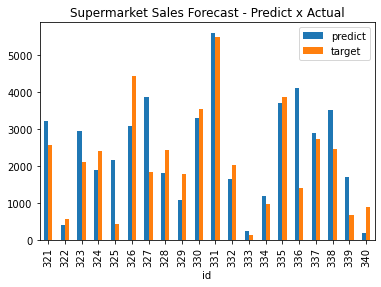

In [29]:
%matplotlib inline  
resultado=pd.DataFrame()
resultado['predict']= predict_test
resultado['target']=target
resultado['id']=np.arange(341) 
resultado=resultado.tail(20)
df = resultado
print(df) 
df.plot(x='id', 
        kind='bar', 
        stacked=False, 
        title='Supermarket Sales Forecast - Predict x Actual') 
plt.show() 